# Example 1: Censored Tobit

We will use some of the Mroz data on female labor force participation and income for these examples. The first 428 observations of the Mroz data contained women who worked in 1975. The remaining 345 bservations contained women who did not work. We will use only the first  50 observations from each of these subsets of the data.

In [1]:
LFP <- read.csv("~/tobit.txt", sep="")

In [4]:
attach(LFP)
summary(LFP)

The following object is masked _by_ .GlobalEnv:

    LFP



      LFP              WHRS             KL6              K618      
 Min.   :0.0000   Min.   :   0.0   Min.   :0.0000   Min.   :0.000  
 1st Qu.:0.0000   1st Qu.:   0.0   1st Qu.:0.0000   1st Qu.:0.000  
 Median :1.0000   Median : 288.0   Median :0.0000   Median :1.000  
 Mean   :0.5684   Mean   : 740.6   Mean   :0.2377   Mean   :1.353  
 3rd Qu.:1.0000   3rd Qu.:1516.0   3rd Qu.:0.0000   3rd Qu.:2.000  
 Max.   :1.0000   Max.   :4950.0   Max.   :3.0000   Max.   :8.000  
       WA              WE              WW              RPWG           HHRS     
 Min.   :30.00   Min.   : 5.00   Min.   : 0.000   Min.   :0.00   Min.   : 175  
 1st Qu.:36.00   1st Qu.:12.00   1st Qu.: 0.000   1st Qu.:0.00   1st Qu.:1928  
 Median :43.00   Median :12.00   Median : 1.625   Median :0.00   Median :2164  
 Mean   :42.54   Mean   :12.29   Mean   : 2.375   Mean   :1.85   Mean   :2267  
 3rd Qu.:49.00   3rd Qu.:13.00   3rd Qu.: 3.788   3rd Qu.:3.58   3rd Qu.:2553  
 Max.   :60.00   Max.   :17.00   Max.   :25.

+ The dependent variable (WHRS) is the wife's hours worked in 1975: NUM DE HORAS OFRECIDAS EN MERC LABORAL
+ The independent variables are a constant 
+ number of children less than 6 years old (KL6)
+ number of children between 6 and 18 (KL618)
+ CIT is a dummy for whether live in a large city or not
+ wife's age (WA)
+ wife's education (WE)

WHRS está censurada (Las mujeres que no trabajan son agrupadas en cero horas)

In [5]:
library(survival)

Estimating the censored Tobit model. Note that the element WHRS > 0 gives the non-censored observations. The "left" option implies left censoring.

In [6]:
ols.out = lm(WHRS~ KL6 + K618 + WA + WE, data=LFP)
summary(ols.out)


Call:
lm(formula = WHRS ~ KL6 + K618 + WA + WE, data = LFP)

Residuals:
    Min      1Q  Median      3Q     Max 
-1355.3  -685.6  -242.2   670.2  3986.2 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1450.031    288.544   5.025 6.29e-07 ***
KL6         -520.362     64.425  -8.077 2.66e-15 ***
K618         -91.624     25.087  -3.652 0.000278 ***
WA           -22.621      4.541  -4.981 7.84e-07 ***
WE            40.733     13.457   3.027 0.002554 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 828.7 on 748 degrees of freedom
Multiple R-squared:  0.1003,	Adjusted R-squared:  0.09549 
F-statistic: 20.85 on 4 and 748 DF,  p-value: 2.617e-16


In [7]:
tobit.out = survreg(Surv(WHRS, WHRS>0, type='left') ~ KL6 + K618 + WA + WE, data=LFP, dist='gaussian')

whrs>0 censurada en cero, type left: censura por izquierda, para que los datos censurados se distribuyan normales, hacer transformación monótona a los datos o si no cambiar la dist, pero la función de max verosimil puede ser más compleja o que no ser convergente.

In [8]:
summary(tobit.out)


Call:
survreg(formula = Surv(WHRS, WHRS > 0, type = "left") ~ KL6 + 
    K618 + WA + WE, data = LFP, dist = "gaussian")
               Value Std. Error      z        p
(Intercept)  1320.87   482.9241   2.74 6.24e-03
KL6         -1077.45   126.2053  -8.54 1.37e-17
K618         -128.26    42.7478  -3.00 2.70e-03
WA            -41.51     7.7026  -5.39 7.11e-08
WE             95.50    22.8631   4.18 2.95e-05
Log(scale)      7.16     0.0376 190.25 0.00e+00

Scale= 1281 

Gaussian distribution
Loglik(model)= -3904.2   Loglik(intercept only)= -3954.9
	Chisq= 101.45 on 4 degrees of freedom, p= 0 
Number of Newton-Raphson Iterations: 3 
n= 753 


El orden de magnitud cambia con respecto a los coef or OLS, Las interpretaciones son las mismas.

Interpretación: (WA= -53.21) El valor predicho de la var. depend se disminuye en 53.2 unidades cuando aumenta la edad de las mujeres.

Tobit regression coefficients are interpreted in the similar manner to OLS regression coefficients; however, the linear effect is on the uncensored latent variable, not the observed outcome.

For a one unit increase in WA, there is a 53.2 point decrease in the predicted value of WHRS.
For a one unit increase in WE, there is a 239.9 point increase in the predicted value of WHRS.

You can obtain predicted values from the Tobit regression as follows:

In [13]:
WHRShat = predict(tobit.out,type="response") 
length(WHRShat)
print(head(WHRShat,20)) #valores predichos sólo en los censurados (y), pero necesitamos todos (y*)

[1] 753

 [1]   61.30482  965.24660 -447.98613  670.96739   37.30060  225.63898
 [7] 1056.72531  225.63898  218.15320  591.69990  968.98949  499.93904
[13] -112.20172  425.67915  362.93009  533.95844  425.67915  206.92453
[19]  599.18569  501.20374


In [14]:
# We will also save the log likelihood for the model for later use.
lltobit = tobit.out$loglik[2:2]
lltobit #valor de verosimilitud

[1] -3904.169

However, this prediction would assume that we are interested in predictions on y*. However, y* is latent and partially determined by a probit. Thus, following Greene, p. 764 the expected value must take into account the probability of censoring. First, get the standard deviation of the latent residuals.

Usando censura se derivan conclusiones basándose en y* (no observable) o en y (observable), obtendremos los valores censurados y no censurados

In [15]:
SD <- tobit.out$scale
SD

[1] 1281.179

In [17]:
# Now calculate the inverse Mills ratio called lambda. dnorm returns the pdf and pnorm the cdf.
lambda = dnorm(WHRShat/SD)/pnorm(WHRShat/SD) #phi min/ phi mayus
print(head(lambda,20))

 [1] 0.7676738 0.3878732 1.0330029 0.4970536 0.7794427 0.6892494 0.3570053
 [8] 0.6892494 0.6927385 0.5289644 0.3865811 0.5671821 0.8544610 0.5990914
[15] 0.6267226 0.5528554 0.5990914 0.6979873 0.5259067 0.5666462


In [19]:
# Now calculate the expected value given censoring and X
EYgivenX = pnorm(WHRShat/SD)*(WHRShat + SD*lambda)
print(head(EYgivenX,20)) #Hacen referencia al y*= censurada+no censurada

 [1]  542.3540 1132.3086  318.0553  915.1338  529.9834  631.8424 1204.1126
 [8]  631.8424  627.5849  860.5275 1135.2087  799.5135  456.9745  751.9115
[15]  712.9532  821.8542  751.9115  621.2308  865.6100  800.3381


## Marginal effects 

Theory suggest (McDonald and Moffit, 1980) a useful decomposition of the marginal effects associated with the censored regression model. They show that a change in the conditional mean due to right side variables derives from two sources:

1) It affects the conditional mean in the uncensored part of the distribution 

2) It affects the conditional mean by also affecting the probability that an observation will lie in the uncensored part of the distribution.

El efecto marginal dice cómo cambia la variable y ante cambios en las x. Suma de la prob de trabajar + la parte de la distribucion asociada a las personas que trabajan

Dos decisiones: Trabajar o no; y si trabajo, cuánto tiempo voy a trabajar.

In [20]:
xbar = as.matrix(colMeans(cbind(1,LFP[3:6]))) # Computingthe mean for control variables
beta = coefficients(tobit.out)
BXoverS = t(beta) %*% xbar/SD  # Computing X'b/ sigma
Mu = dnorm(BXoverS)/pnorm(BXoverS)
P = pnorm(BXoverS)
print(P)
marginaleffects= beta%*%P

          [,1]
[1,] 0.5922907


In [22]:
#Descomposici?n
P1 = P*(1-BXoverS*Mu-Mu^2) #pag 766 1-lambda(alphai-lambdai)
print(P1) #Distribuci?n d ela parte no censurada (de los que trabajan)
P2 = dnorm(BXoverS)*BXoverS+dnorm(BXoverS)*Mu
print(P2) #Prob de trabajar o no 

         [,1]
[1,] 0.247205
          [,1]
[1,] 0.3450857


We can also calculate marginal effects on the expected value of the unconditional distribution, the expected value of the uncensored distribution, as well as probabilities of being in the uncensored part of the distribution as follows.

Valor esperado incondicional (Sin efecto de las variables de control) (coger todos los datos históricos y sacar un promedio)

condicional: usar variables explicativas

In [24]:
N=nrow(LFP)
censored = sum(WHRS<=0) # 50 censored observations
Fz = (N-censored)/N 
z = qnorm(Fz)
fz = 1/sqrt(2*pi)*exp(-.5*z^2) # Standard normal distribution
cond = (1-(z*fz/Fz))-fz^2/Fz^2
uncond = Fz
prob = fz/SD
rawcoeff = beta[2:5]
mfxuncond = rawcoeff*uncond #1
mfxuncensored = rawcoeff*cond #2
puncensored = rawcoeff*prob #3
table = cbind(rawcoeff,mfxuncond,mfxuncensored,puncensored)
print(table) #columnas (coeficientes, efectos incondi, efectos marginales no censurados, pro de no estar censurado)

        rawcoeff  mfxuncond mfxuncensored puncensored
KL6  -1077.44833 -612.41419    -433.81754 -0.33056075
K618  -128.25846  -72.90122     -51.64124 -0.03934965
WA     -41.50519  -23.59126     -16.71141 -0.01273378
WE      95.50376   54.28368      38.45308  0.02930052


Interpretación KL6:

-1523: Manteniendo lo demás constantes, es un aumento en el num de hijos menores de seis disminuye el num de horas ofrecidas en el mercado

-761: (Sin la presencia de las demás variables) El efecto de tener hijos menores de seis 

-553: Un aumento en un hijo menor de seis disminuye el número de horas que se ofrecen

-0.43: Tener hijos menores a seis disminuye la prob de trabajar

## Checking normality

The censored regression model assumes that the uncensored part of the  distribution is normal. If it is not, then estimates are inconsistent. We can test this assumption. Drop the censored observations and test for normality 

In [25]:
LFP2 = subset(LFP, subset=WHRS>0)
summary(LFP2)

      LFP         WHRS             KL6              K618            WA       
 Min.   :1   Min.   :  12.0   Min.   :0.0000   Min.   :0.00   Min.   :30.00  
 1st Qu.:1   1st Qu.: 609.5   1st Qu.:0.0000   1st Qu.:0.00   1st Qu.:35.00  
 Median :1   Median :1365.5   Median :0.0000   Median :1.00   Median :42.00  
 Mean   :1   Mean   :1302.9   Mean   :0.1402   Mean   :1.35   Mean   :41.97  
 3rd Qu.:1   3rd Qu.:1910.5   3rd Qu.:0.0000   3rd Qu.:2.00   3rd Qu.:47.25  
 Max.   :1   Max.   :4950.0   Max.   :2.0000   Max.   :8.00   Max.   :60.00  
       WE              WW               RPWG            HHRS     
 Min.   : 5.00   Min.   : 0.1282   Min.   :0.000   Min.   : 175  
 1st Qu.:12.00   1st Qu.: 2.2626   1st Qu.:1.420   1st Qu.:1920  
 Median :12.00   Median : 3.4819   Median :3.195   Median :2106  
 Mean   :12.66   Mean   : 4.1777   Mean   :3.186   Mean   :2233  
 3rd Qu.:14.00   3rd Qu.: 4.9707   3rd Qu.:4.550   3rd Qu.:2504  
 Max.   :17.00   Max.   :25.0000   Max.   :9.980   Max.   

In [37]:
library(e1071)
skewness(LFP2$WHRS)
kurtosis(LFP2$WHRS)

[1] 0.401535

[1] 0.6859986

[1] 126  37

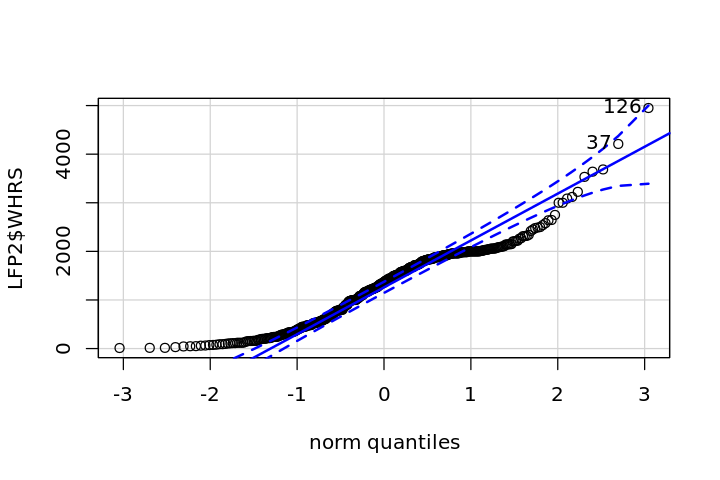

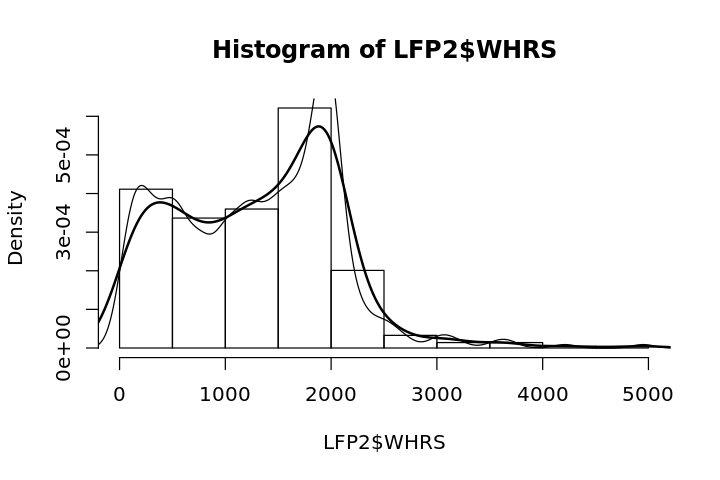

In [27]:
library(car)
options(repr.plot.width=6, repr.plot.height=4)
qqPlot(LFP2$WHRS, dist= "norm")
hist(LFP2$WHRS, probability=T, ylab='Density')
lines(density(LFP2$WHRS), lwd=2)
lines(density(LFP2$WHRS, adjust=.5), lwd=1)

Al parecer los datos no censurados no son normales, una opción es modelar los datos en dos etapas para no tener que asumir normalidad

N is small here, so we cannot be fully confident of these tests. However, there is some evidence of non-normality.

## Cragg's model

Cragg has suggested that assuming a censoring limit that depends on the same distribution as the uncensored observations is often incorrect. He suggests a two equation system in which the first equation estimates the probability of being above the censoring limit and the second is a truncated regression on the uncensored observations. Below we estimate Cragg's  model using Probit and a Truncated regression procedure. Also, we do a likelihood ratio test  of whether Cragg's model is significantly different than the Tobit model.

Modelar si trabajo o no (parte de la censura)

Modelar por aparte el modelo truncado (quitar los censurados y analizar los demás)

In [28]:
library(Zelig)

probit.out = zelig(LFP ~ KL6 + K618 + WA + WE,  model = "probit", data = LFP)
summary(probit.out)
probitsummary.out = summary(probit.out) # modelo para la censura) se escoge probit porque se asume normalidad
llprobit = -.5 * probitsummary.out$deviance 
llprobit = -.5 * 116.31
llprobit 

How to cite this model in Zelig:
  R Core Team. 2007.
  probit: Probit Regression for Dichotomous Dependent Variables
  in Christine Choirat, Christopher Gandrud, James Honaker, Kosuke Imai, Gary King, and Olivia Lau,
  "Zelig: Everyone's Statistical Software," http://zeligproject.org/
Model: 

Call:
z5$zelig(formula = LFP ~ KL6 + K618 + WA + WE, data = LFP)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1459  -1.1535   0.6783   0.9855   2.3031  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)
(Intercept)  0.623795   0.464538   1.343    0.179
KL6         -0.886118   0.113451  -7.811 5.69e-15
K618        -0.055693   0.040328  -1.381    0.167
WA          -0.038268   0.007446  -5.140 2.75e-07
WE           0.120031   0.022187   5.410 6.30e-08

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1029.75  on 752  degrees of freedom
Residual deviance:  930.22  on 748  degrees of freedom
AIC: 940.22

Number of Fisher Scoring ite

[1] -58.155

We will write our own procedure for the truncated normal regression on the uncensored observations using MLE. First, create a new dataset using the uncensored observations.

In [29]:
LFPsubset <- subset(LFP, subset=LFP>0)
x = cbind(1,LFPsubset[3:6])
y = as.vector(LFPsubset$WHRS)
K = ncol(x)
K1 = K+1
n = nrow(x)
# Assign the lower truncation limit
L = 0
# Define the function to be optimized
llik.ltruncnormal <- function(par,X,Y) {
Y = as.vector(y)
X = as.matrix(x)
xbeta = X%*%par[1:K]
Sig = par[K1:K1]
  sum( log((1/Sig)*dnorm((Y-xbeta)/Sig))-log(1-pnorm((L-xbeta)/Sig)))
} 
llik.ltruncnormal

function(par,X,Y) {
Y = as.vector(y)
X = as.matrix(x)
xbeta = X%*%par[1:K]
Sig = par[K1:K1]
  sum( log((1/Sig)*dnorm((Y-xbeta)/Sig))-log(1-pnorm((L-xbeta)/Sig)))
}

Now let's use the above function to estimate the model. Get start values from a regular regression.

In [30]:
regress.out = lm(WHRS ~ KL6 + K618 + WA + WE, data = LFPsubset) #modleo para el truncmaiento (datos no censurados)
startvalues = c(coefficients(regress.out),120)

In [32]:
# Estimate the lower truncated regression.
ltrunc.out = optim(startvalues,llik.ltruncnormal, method = "BFGS", control = list(trace=1,maxit=100,fnscale = -1),hessian = TRUE)
print(ltrunc.out)

initial  value 10808.071920 
iter  10 value 3418.998038
iter  20 value 3410.589849
iter  30 value 3410.240545
iter  40 value 3409.748892
iter  50 value 3409.645797
iter  60 value 3409.625150
iter  70 value 3409.292826
iter  80 value 3409.177085
iter  90 value 3409.106874
final  value 3409.106505 
converged
$par
(Intercept)         KL6        K618          WA          WE             
 2161.99348  -444.87552  -176.99225   -10.14405   -26.41912   896.08744 

$value
[1] -3409.107

$counts
function gradient 
      94       92 

$convergence
[1] 0

$message
NULL

$hessian
              (Intercept)           KL6          K618           WA
(Intercept) -3.705054e-04 -4.035883e-05 -4.534968e-04 -0.015653541
KL6         -4.035883e-05 -4.820322e-05 -6.184564e-05 -0.001391868
K618        -4.534968e-04 -6.184564e-05 -1.132548e-03 -0.017707634
WA          -1.565354e-02 -1.391868e-03 -1.770763e-02 -0.683667963
WE          -4.669005e-03 -5.438778e-04 -5.640914e-03 -0.196834890
            -3.061587e-04

In [34]:
# Calculate standard errors, z statistics, and pvalues and report in a table.
v = -solve(ltrunc.out$hessian)
se = sqrt( diag(v))
b = ltrunc.out$par
zstat = b/se
pzstat = 2* (1 - pnorm(abs(zstat)))
table = cbind(b,se,zstat,pzstat)
print(table) #modelo truncado

                     b         se     zstat       pzstat
(Intercept) 2161.99348 480.555866  4.498943 6.829214e-06
KL6         -444.87552 160.703176 -2.768306 5.634857e-03
K618        -176.99225  46.527523 -3.804033 1.423590e-04
WA           -10.14405   7.724521 -1.313226 1.891067e-01
WE           -26.41912  23.129680 -1.142217 2.533637e-01
             896.08744  47.591266 18.828821 0.000000e+00


In [35]:
# Get the log likelihood from the truncated regression.
lltruncate = ltrunc.out$value
print(lltruncate)

[1] -3409.107


In [36]:
# Calculate Cragg's test statistic (para ver si es mejor el de dos etapas o el censurado)
lrtest = 2*((llprobit+lltruncate)-lltobit)
print(lrtest) #comparar con una chi cuadrado 

[1] 873.8144


$H_0$: mejor el modelo restringido (una sola etapa, es decir el censurado)
como estadístico=14.33 es mayor al cuantil chi =11 se rechaza, luego es mejor el de dos etapas

The restricted model is Tobit. The unrestricted model is the two models estimated separately. The test statistic is 14.34, which is chi-squared with 5 degrees of  freedom for the number of additional parameters being estimated. The critical value is 11.07, so we reject the null that the restricted model is true. The two equation approach is therefore more appropriate than Tobit.

## Using a different package

### You can use also VGAM package. Example in https://stats.idre.ucla.edu/r/dae/tobit-models/

In [38]:
library(VGAM)
summary(tobit1.out <- vglm( WHRS~ KL6 + K618 + WA + WE, tobit(Lower = 0), data = LFP))

Loading required package: stats4
Loading required package: splines

Attaching package: ‘VGAM’

The following object is masked from ‘package:car’:

    logit




Call:
vglm(formula = WHRS ~ KL6 + K618 + WA + WE, family = tobit(Lower = 0), 
    data = LFP)

Pearson residuals:
                Min      1Q   Median     3Q    Max
mu          -12.458 -1.0611  0.00687 0.9639  2.405
loglink(sd)  -1.007 -0.5926 -0.06737 0.2915 13.771

Coefficients: 
                Estimate Std. Error z value Pr(>|z|)    
(Intercept):1  1.321e+03  4.822e+02   2.739  0.00616 ** 
(Intercept):2  7.156e+00  3.642e-02 196.446  < 2e-16 ***
KL6           -1.077e+03  1.272e+02  -8.467  < 2e-16 ***
K618          -1.283e+02  4.311e+01  -2.975  0.00293 ** 
WA            -4.151e+01  7.659e+00  -5.419 5.99e-08 ***
WE             9.551e+01  2.275e+01   4.198 2.69e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Names of linear predictors: mu, loglink(sd)

Log-likelihood: -3904.169 on 1500 degrees of freedom

Number of Fisher scoring iterations: 6 

No Hauck-Donner effect found in any of the estimates


Conclusión: Los Supuestos deben cumplirse: el de distribución y homocedasticidad

# Example 2: Sample selection bias

In these cases the truncation is incidental, due to sample selection on another variable that is correlated with the truncation in the dependent variable. As discussed in class, the standard model is Heckman's two stage procedure. Once again, there is no "canned" procedure in R to do the Heckman model. 
#Truncamiento incidental: No se deriva del muestreo o el dise?o sino se deriva de las decisiones de las personas frente al problema a modelar
First, estimate the first stage probit.
Modelar en dos etapas:Ecuación de decisión (sí o no) 
Modelar dado que sí con los resultados calcular el inverso de mills y luego modelar con la variabe resultante, el número de horas ofrecidas en la ec 1 debe haber variable diferente (instrumental) a la ec dos

In [39]:
#La variable instrumental usada es CIT
heckprob.out = zelig(LFP ~ CIT + KL6, model="probit", data=LFP) #1a ETAPA
# Se pueden incluir adem?s de kl6, las dem?s variables explicativas dadas inicialmente
summary(heckprob.out)

How to cite this model in Zelig:
  R Core Team. 2007.
  probit: Probit Regression for Dichotomous Dependent Variables
  in Christine Choirat, Christopher Gandrud, James Honaker, Kosuke Imai, Gary King, and Olivia Lau,
  "Zelig: Everyone's Statistical Software," http://zeligproject.org/
Model: 

Call:
z5$zelig(formula = LFP ~ CIT + KL6, data = LFP)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.4050  -1.3768   0.9658   0.9903   1.7575  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)
(Intercept)  0.32469    0.08163   3.978 6.96e-05
CIT         -0.03910    0.09738  -0.402    0.688
KL6         -0.54005    0.09438  -5.722 1.05e-08

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1029.75  on 752  degrees of freedom
Residual deviance:  994.57  on 750  degrees of freedom
AIC: 1000.6

Number of Fisher Scoring iterations: 4

Next step: Use 'setx' method


In [43]:
# Now retrieve the index function from the probit
gamma=as.matrix(coef(heckprob.out))
w = cbind(1,CIT,KL6)
z = w %*% gamma
dim(w)
dim(z)

[1] 753   3

[1] 753   1

In [44]:
# Now calculate lambda and delta
LFP$lambda = dnorm(z)/pnorm(z)
LFP$delta = lambda *(lambda+z) # esta cantidad es adicional (ver libro Grind)
detach(LFP)
attach(LFP)

The following objects are masked _by_ .GlobalEnv:

    lambda, LFP

The following object is masked from package:carData:

    UN



In [45]:
# Now get the subset of the data that suffers from selection bias
LFPheckman = subset(LFP, subset=LFP>0) #Personas que sí trabajan

In [46]:
# Now run the second stage regression that includes lambda (the Mills ratio) from the probit. 
heckman.out = lm( WHRS ~ KL6 + K618 + WA + WE + lambda, data=LFPheckman) #2a ETAPA, lamda=inverso de mills
summary(heckman.out) #Modelo OLS


Call:
lm(formula = WHRS ~ KL6 + K618 + WA + WE + lambda, data = LFPheckman)

Residuals:
    Min      1Q  Median      3Q     Max 
-1535.2  -600.0    86.9   516.4  3587.2 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2925.316   1791.096   1.633 0.103161    
KL6           112.422   1036.942   0.108 0.913717    
K618         -119.267     30.569  -3.902 0.000111 ***
WA             -8.430      5.504  -1.532 0.126366    
WE            -21.386     16.409  -1.303 0.193175    
lambda      -1280.112   2933.638  -0.436 0.662801    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 755.4 on 422 degrees of freedom
Multiple R-squared:  0.06407,	Adjusted R-squared:  0.05298 
F-statistic: 5.778 on 5 and 422 DF,  p-value: 3.57e-05


The coefficients from this OLS regression are now unbiased due to the inclusion of the source of the bias in the equation. 

However, the standard errors and inferential statistics will be incorrect due to not taking into account the sampling variability contained in lambda. Also, the residuals are heteroskedastic by definition. We need to compute a corrected covariance matrix of estimates for both problems.

In [49]:
# First, get the standard error of the regression corrected for selection. (Grind)
#Esto es para asegurarse de que hay homocedasticidad
blambda = heckman.out$coefficients[6:6]
deltabar = mean(LFPheckman$delta)
sigma = sqrt(((t(heckman.out$residuals) %*% heckman.out$residuals)/nrow(LFPheckman))+ deltabar*blambda^2)
print(blambda)
print(deltabar)
print(sigma)

   lambda 
-1280.112 
[1] 0.5092108
         [,1]
[1,] 1181.994


In [50]:
# Next obtain rho in the correction rho*sigma*lambda*wgamma, Greene p. 784
rho2 = blambda^2/sigma^2
rho = sqrt(rho2)
print(rho2)
print(rho)

         [,1]
[1,] 1.172912
         [,1]
[1,] 1.083011


In [51]:
# Next obtain an n x n Identity matrix, the Delta matrix, and I-rho^2 Delta.
# These are from Greene, p 785
n = nrow(LFPheckman)
I = matrix(0,nrow=n,ncol=n)
I[row(I)==col(I)] = 1
print(n)
Delta = as.vector(LFPheckman$delta[,1]) * I
IminusRho2Delta = (I - as.numeric(rho2)*Delta)
length(Delta)
length(IminusRho2Delta)

[1] 428


[1] 183184

[1] 183184

In [53]:
# Now calculate the correction factor Q
xstar = cbind(1,LFPheckman[,2],LFPheckman[,3],LFPheckman[,4],LFPheckman[,5],LFPheckman[,6])
w = cbind(1,LFPheckman$CIT,LFPheckman$KL6)
length(xstar)
length(w)

[1] 2568

[1] 1284

In [56]:
Q = (t(xstar) %*% Delta %*% w) %*% vcov(heckprob.out) %*% (t(w) %*% Delta %*% xstar)
#length(Q)

ERROR: Error in (t(xstar) %*% Delta %*% w) %*% vcov(heckprob.out): requires numeric/complex matrix/vector arguments


In [54]:
# Now, obtain the corrected asymptotic covariance matrix of coefficients.
#vcovheckman = as.numeric(sigma^2) *(solve(t(xstar) %*% xstar) %*% (t(xstar) %*% IminusRho2Delta %*% xstar + Q) %*% solve(t(xstar) %*% xstar))

ERROR: Error in eval(expr, envir, enclos): object 'Q' not found


In [55]:
# Now produce corrected standard errors, z statistics and pvalues along with the coefficients
se = sqrt( diag(vcovheckman))
b = heckman.out$coefficients[1:6]
zstat = b/se
pzstat = 2* (1 - pnorm(abs(zstat)))
table = cbind(b,se,zstat,pzstat)
print(table)

ERROR: Error in diag(vcovheckman): object 'vcovheckman' not found


## Using sampleSelection package

In [66]:
library(zoo)
library(lmtest)
library(Matrix) 
library(systemfit)
library(miscTools)
library(maxLik)
library(sampleSelection) #Manejar problemas de selección


Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Attaching package: ‘lmtest’

The following object is masked from ‘package:VGAM’:

    lrtest


Please cite the 'systemfit' package as:
Arne Henningsen and Jeff D. Hamann (2007). systemfit: A Package for Estimating Systems of Simultaneous Equations in R. Journal of Statistical Software 23(4), 1-40. http://www.jstatsoft.org/v23/i04/.

If you have questions, suggestions, or comments regarding the 'systemfit' package, please use a forum or 'tracker' at systemfit's R-Forge site:
https://r-forge.r-project.org/projects/systemfit/

Please cite the 'maxLik' package as:
Henningsen, Arne and Toomet, Ott (2011). maxLik: A package for maximum likelihood estimation in R. Computational Statistics 26(3), 443-458. DOI 10.1007/s00180-010-0217-1.

If you have questions, suggestions, or comments regarding the 'maxLik' package, please use a forum or 'tracker' at maxLik's R-Forge site:
https://r-

ERROR: Error in library(sampleSelection): there is no package called ‘sampleSelection’


The data se Mroz87 is 1975 data on married women's pay and labor-force participation. We will estimate a log wage equation for married women, in which the natural log of wages is a function of education, experience, experience squared, and a dummy variable for living in a big city. The issue here is that we can only observe the wage for women who are working for a wage. A substantial proportion of married women in 1975 were out of the labor force, so an OLS estimate of the wage equation would be estimated using a sample subject to considerable sample selection, potentially resulting in bias of the nature discussed above.
Because we have observations in the data set on non-participants (not working for pay), we can implement models that correct for the selection process.

In [61]:
Mroz87=read.csv("~/Mroz87.txt", sep="")
#data(Mroz87)
print(head(Mroz87))
attach(Mroz87)

  lfp hours kids5 kids618 age educ   wage repwage hushrs husage huseduc huswage
1   1  1610     1       0  32   12 3.3540    2.65   2708     34      12  4.0288
2   1  1656     0       2  30   12 1.3889    2.65   2310     30       9  8.4416
3   1  1980     1       3  35   12 4.5455    4.04   3072     40      12  3.5807
4   1   456     0       3  34   12 1.0965    3.25   1920     53      10  3.5417
5   1  1568     1       2  31   14 4.5918    3.60   2000     32      12 10.0000
6   1  2032     0       0  54   12 4.7421    4.70   1040     57      11  6.7106
  faminc    mtr motheduc fatheduc unem city exper  nwifeinc wifecoll huscoll
1  16310 0.7215       12        7  5.0    0    14 10.910060    FALSE   FALSE
2  21800 0.6615        7        7 11.0    1     5 19.499981    FALSE   FALSE
3  21040 0.6915       12        7  5.0    0    15 12.039910    FALSE   FALSE
4   7300 0.7815        7        7  5.0    0     6  6.799996    FALSE   FALSE
5  27300 0.6215       12       14  9.5    1     7 20.10

The following objects are masked from Mroz87 (pos = 3):

    age, city, educ, exper, faminc, fatheduc, hours, husage, huscoll,
    huseduc, hushrs, huswage, kids5, kids618, lfp, motheduc, mtr,
    nwifeinc, repwage, unem, wage, wifecoll



In [62]:
# OLS: log wage regression on LF participants only
ols1 = lm(log(wage) ~ educ + exper + I( exper^2 ) + city, data=subset(Mroz87, lfp==1))
summary(ols1)


Call:
lm(formula = log(wage) ~ educ + exper + I(exper^2) + city, data = subset(Mroz87, 
    lfp == 1))

Residuals:
     Min       1Q   Median       3Q      Max 
-3.10084 -0.32453  0.05292  0.36261  2.34806 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.5308476  0.1990253  -2.667  0.00794 ** 
educ         0.1057097  0.0143280   7.378 8.58e-13 ***
exper        0.0410584  0.0131963   3.111  0.00199 ** 
I(exper^2)  -0.0007973  0.0003938  -2.025  0.04352 *  
city         0.0542225  0.0680903   0.796  0.42629    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6667 on 423 degrees of freedom
Multiple R-squared:  0.1581,	Adjusted R-squared:  0.1501 
F-statistic: 19.86 on 4 and 423 DF,  p-value: 5.389e-15


Now lets turn to two alternative methods for estimating the wage equation with selection. The first is the so-called heckit or Heckman two-step correction model. A first-stage probit equation estimates the selection process (who is in the labor force?), and the results from that equation are used to construct a variable that captures the selection effect in the wage equation. This correction variable is called the inverse Mills ratio.

In principle, the selection equation and the wage equation could have exactly the same set of regressors. But this is usually not a good idea. To get a good estimate of the selection model, it is very desirable to have at least one variable in the selection equation that acts like an instrument: that is, a variable that one expects would affect the selection process, but not the wage process, except through selection. In this example, the kids variable might play such a role, if we can assume that women with kids may be more likely to be stay-at-home moms, but for working moms having kids would not affect their hourly pay rate. So that we have to create a new variable that is the number of children under 18 named kids (we also cuald use  a dummy for the woman having children under 18), and we will use this as an instrument for labor-force participation.

In [63]:
kids=kids5+kids618 #Variable instrumental, es buena porque afecta si trabaja o no, pero no fecta el salario
# Two-step estimation with LFP selection equation
heck1 = heckit( lfp ~ age + I( age^2 ) + kids + huswage + educ, log(wage) ~ educ + exper + I( exper^2 ) + city, data=Mroz87 )
#heckit(1a ecuaci?n, 2a ecuaci?n)
summary(heck1)

ERROR: Error in heckit(lfp ~ age + I(age^2) + kids + huswage + educ, log(wage) ~ : could not find function "heckit"


The set-up is in the spirit of the standard lm, but in this case note that we have two equations, separated by a comma.

The first equation in the command is the selection process, which is estimated as a probit:lfp ~ age + I( age^2 ) + faminc + kids + huswage + educ. The dependent variable is always the binary variable for being selected into the sample– in this case, it is lfp, which is a dummy variable equal to one if the woman is participating in the labor force (and is thus being paid and observed for the wage equation). Then there is a comma, followed by: The second equation, which is the wage regression of interest:log(wage) ~ exper + I( exper^2 ) + educ + city.

The selection equation should include as regressors variables that are likely to affect the selection process. In our example we want variables that could plausibly affect whether or not a married woman would be in the labor force. Examine the variables included here, make sure you know what they are, and see if you can understand why they would be included in the lfp equation.

## Maximum likelihood estimation (MLE)

An alternative statistical method to accomplish the same result as the Heckman model is to estimate the selection model using maximum likelihood (ML) for both equations simultaneously. We will discuss this further in class. For now, note that the syntax for the command is virtually identical to the heckit:

In [64]:
# ML estimation of selection model
ml1 = selection( lfp ~ age + I( age^2 ) + kids + huswage + educ, log(wage) ~ educ + exper + I( exper^2 ) + city, data=Mroz87 ) 

ERROR: Error in selection(lfp ~ age + I(age^2) + kids + huswage + educ, log(wage) ~ : could not find function "selection"


In [65]:
# Summary results using the stargazer table
library(stargazer)
stargazer(ols1, heck1, ml1,  
          title="Married women's wage regressions", type="text", 
          df=FALSE, digits=4)


Please cite as: 

 Hlavac, Marek (2018). stargazer: Well-Formatted Regression and Summary Statistics Tables.
 R package version 5.2.2. https://CRAN.R-project.org/package=stargazer 



ERROR: Error in .stargazer.wrap(..., type = type, title = title, style = style, : object 'heck1' not found


As you can see, the selection corrections did not have a big effect on any of the parameters of interest. The estimated returns to education and experience are a bit larger in the selection regressions, but the difference is really small. In this case it appears that the OLS equation on the selected sample may not have been very biased after all.

In the panel below the coefficients, note that there is an estimate for rho in the selection models: columns (2) and (3). This is an estimate of the correlation of the errors between the selection and wage equations. In the lower panel, the estimated coefficient on the inverse Mills ratio is given for the Heckman model. The fact that it is not statistically different from zero is consistent with the idea that selection bias was not a serious problem in this case.

The final stargazer table in the script includes the option selection.equation=TRUE, which means the table will show you the first-stage probit model for lfp, if you are interested in what factors affect the selection process itself.